# Trade System
- [x] [Get Binance Data](#Get-Data-from-Binance)
- [x] [Database](#Get-Data)
- [x] [Indicator](#Indicators)
- [x] [Strategy](#Strategy)
- [ ] [Backtesting](#Backtesting)
- [ ] [Optimization](#Optimization)
- [ ] [Send Order](#Send-Order)

### API parameter
    https://binance-docs.github.io/apidocs/futures/cn/#api
### OrderTypes
    LIMIT, MARKET, STOP, STOP_MARKET, TAKE_PROFIT, TAKE_PROFIT_MARKET, TRAILING_STOP_MARKET
### Side
    BUY, SELL
### Interval
    1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M
### Exchange information
    https://api.binance.com/api/v1/exchangeInfo
### Trades (from ID)
    /fapi/v1/trades  
    /fapi/v1/historicalTrades
### K lines
    /fapi/v1/klines  
    https://binance-docs.github.io/apidocs/futures/cn/#k  
    https://binance-docs.github.io/apidocs/futures/cn/#k-6  
|name	|type	|require |discription |
| ---   | ---   | ---    | ---        |
|symbol|STRING	|YES |交易對|
|interval |ENUM	|YES |時間間隔|
|startTime |LONG |NO |起始時間|
|endTime |LONG |NO |結束時間|
|limit |INT |NO |筆數 default:500 max:1500| 


In [1]:
import requests
import inspect
import strategy
import binance_data
import numpy as np
import pandas as pd
from enum import Enum
import indicators as ta
from datetime import datetime

In [4]:
np.__version__, pd.__version__, matplotlib.__version__, bokeh.__version__

('1.22.3', '1.4.3', '3.5.1', '2.4.3')

## Get Data from Binance

https://api.binance.com/api/v3/klines?symbol=BTCUSDC&interval=1d&limit=1000&startTime=1640966400000

In [37]:
# import binance_data

In [5]:
[func[0] for func in inspect.getmembers(binance_data, inspect.isfunction)]

['datetime_timestamp',
 'get_exchange_info',
 'get_klines',
 'get_price_data',
 'get_symbol']

In [21]:
symbol_list = binance_data.get_symbol("BTC", "USDT") # margined = "USDT"
interval = binance_data.Interval.Minute_30.value
start_time = binance_data.datetime_timestamp(2021, 10, 1, 0, 0, 0)
end_time = binance_data.datetime_timestamp(2022, 7, 30, 0, 0, 0)

In [22]:
price_data = {}
for symbol in symbol_list:
    price_data[symbol] = binance_data.get_price_data(symbol, interval, start_time, end_time)

2021-10-01 00:00:00 2021-10-21 19:30:00 1000
2021-10-21 20:00:00 2021-11-11 15:30:00 1000
2021-11-11 16:00:00 2021-12-02 11:30:00 1000
2021-12-02 12:00:00 2021-12-23 07:30:00 1000
2021-12-23 08:00:00 2022-01-13 03:30:00 1000
2022-01-13 04:00:00 2022-02-02 23:30:00 1000
2022-02-03 00:00:00 2022-02-23 19:30:00 1000
2022-02-23 20:00:00 2022-03-16 15:30:00 1000
2022-03-16 16:00:00 2022-04-06 11:30:00 1000
2022-04-06 12:00:00 2022-04-27 07:30:00 1000
2022-04-27 08:00:00 2022-05-18 03:30:00 1000
2022-05-18 04:00:00 2022-06-07 23:30:00 1000
2022-06-08 00:00:00 2022-06-28 19:30:00 1000
2022-06-28 20:00:00 2022-07-19 15:30:00 1000
2022-07-19 16:00:00 2022-07-30 00:00:00 497
------ BTCUSDT ------ 2021-10-01 00:00:00 - 2022-07-30 00:00:00
2021-10-01 00:00:00 2021-10-21 19:30:00 1000
2021-10-21 20:00:00 2021-11-11 15:30:00 1000
2021-11-11 16:00:00 2021-12-02 11:30:00 1000
2021-12-02 12:00:00 2021-12-23 07:30:00 1000
2021-12-23 08:00:00 2022-01-13 03:30:00 1000
2022-01-13 04:00:00 2022-02-02 23:30:

In [23]:
price_data.keys()

dict_keys(['BTCUSDT', 'BTCUPUSDT', 'BTCDOWNUSDT', 'BTCSTUSDT'])

## Get Data

    Get data from database(todo)

In [25]:
col = ["Open time", "Open", "High", "Low", "Close", "Volume"]
df = price_data["BTCUSDT"][col]
df = df.rename({"Open time": 'Date'}, axis=1)
df.Date = (df["Date"] / 1000).apply(datetime.fromtimestamp)
df = df.astype({col: float for col in df.columns[1:]})

In [26]:
df

,Date,Open,High,Low,Close,Volume
0,2021-10-01 00:00:00,43149.02,43218.00,42914.33,42954.29,801.52103
1,2021-10-01 00:30:00,42954.30,42997.77,42819.86,42950.67,800.71902
2,2021-10-01 01:00:00,42950.66,43314.50,42933.29,43017.60,864.06192
3,2021-10-01 01:30:00,43017.61,43400.00,42906.69,43333.12,1128.33387
4,2021-10-01 02:00:00,43333.12,43473.45,43261.84,43397.54,616.15522
...,...,...,...,...,...,...
14492,2022-07-29 22:00:00,23695.41,24222.00,23661.51,24127.91,11839.61660
14493,2022-07-29 22:30:00,24127.91,24220.30,24019.46,24036.61,6558.45146
14494,2022-07-29 23:00:00,24034.81,24071.04,23870.59,23881.82,6120.36050
14495,2022-07-29 23:30:00,23881.82,24038.14,23879.12,24010.74,3853.29180


## Indicators

```
def indicator(data, para1, para2...):    
    return array
```

* Indicator and position-related 
* 分成ta和strategy兩個py 檔
* MACD, ADX, Bollinger Band, CCI

In [ ]:
pd.set_option("display.max_rows", 1000, "display.max_columns", None,'display.max_colwidth', None)

In [12]:
# import indicators as ta

In [27]:
[func[0] for func in inspect.getmembers(ta, inspect.isfunction)]

['ADX',
 'ATR',
 'EMA',
 'KD',
 'MA',
 'RSI',
 'WMA',
 'crossover',
 'crossunder',
 'entry_high',
 'entry_low',
 'tralling_stop']

## Broker

      def position(order[entry&exit], data):
          return position_we_get
          
      Return price and position that you get

In [28]:
def get_position(entry, exit = pd.DataFrame([])):
    
    if exit.empty:
        exit = pd.DataFrame(0, index = range(len(entry)), columns = ["exit"])
    position = entry.copy()
    for i in range(1, len(entry)):
        position.iloc[i] = (entry.iloc[i] if entry.iloc[i] else position.iloc[i - 1]) * (exit.iloc[i] == 0)
    position = position.shift(1)
    return position.fillna(0)

## Strategy

```
def strategy_signal(data, para1, para2...):    
    return array
```

    分為進場訊號和停損停利兩個array

In [9]:
# import strategy

In [29]:
[func[0] for func in inspect.getmembers(strategy, inspect.isfunction)]

['ketlner']

In [30]:
para = {"num": 5, "ratio": 1}

<AxesSubplot:>

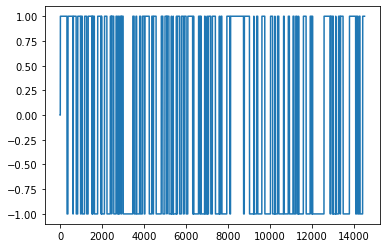

In [31]:
pd.Series(get_position(strategy.ketlner(df, para)[0], strategy.ketlner(df, para)[1])).plot()

## Backtesting

```
def strategy_performance(symbol, interval, starttime, endtime, strategy, para..., output=[drawdown, profit...]):
    return summary[output], graph 
```

    Divide into all trades, long trades, short trade
    net profit, gross profit, gross loss, maximun drawdown, win rate, sharpe ratio, sortino ratio, calmar ratio

In [12]:
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

###  Todo
- [ ] Partial Exit
- [ ] Commission
- [ ] Summary devides into long trsdes and short trades
- [ ] Summart add start/end date, duration, exposure time(%), avg win trade, avg loss trade
- [ ] Sharpe Ratio annually
- [ ] Optimization
- [ ] Time analysis(trading period, time in the market, percent in the market, max run-up date, max drawdown date)

In [13]:
class Backtest():
    def __init__(self, data, strategy, parameter, commision = 0.004, capital = 100000, riskfree_rate = 0.01):
        self.df = data.copy()
        self.strategy = strategy
        self.parameter = parameter
        self.summary = {}
        self.trade_list = []
        self.commision = commision
        self.capital = capital
        self.rate = riskfree_rate
    
    def get_position(self, entry, exit = pd.DataFrame([])):
        """
        Get Position
        
        Parameters
        ----------
        entry: entry signal
        exit: exit signal 
        """
        if exit.empty:
            exit = pd.DataFrame(0, index = range(len(entry)), columns = ["exit"])
        position = entry.copy()
        for i in range(1, len(entry)):
            position.iloc[i] = (entry.iloc[i] if entry.iloc[i] else position.iloc[i - 1]) * (exit.iloc[i] == 0)
        position = position.shift(1)
        return position.fillna(0)
    
    def strategy_performance(self):
        """
        Calculate Strategy performance
        """
        self.df["Entry"], self.df["Exit"] = self.strategy(self.df, self.parameter)
        self.df["Position"] = self.get_position(self.df.Entry, self.df.Exit)
        self.df["PnL"] = ((self.df.Close - self.df.Close.shift(1)) * self.df.Position).cumsum()
        self.df[["Equity_long", "Equity_short", "Equity"]] = pd.DataFrame(self.capital, index = range(len(df)), columns = ["l", "s", "all"])
        self.df[["Run_up", "Drawdown"]] = pd.DataFrame(0, index = range(len(df)), columns = ["r", "d"])        
        self.trade_list = [] # type, quantity, entry_time, entry_price, exit_time, exit_price, profit, profit_cum, entry_high, entry_low
        entry_info = [] # position, entry_time, entry_price, entry_high, entry_low
        equity_max, equity_min = self.capital, self.capital
        profit_cum = 0
        
        for i in range(1, len(self.df)):
            # Position != 0
            if self.df.Position[i]:
                # first entry
                if self.df.Position[i - 1] == 0:
                    entry_info.append([self.df.Position[i], self.df.Date[i], self.df.Close[i - 1], self.df.High[i], self.df.Low[i]])                    
                
                # same sign
                elif self.df.Position[i - 1] * self.df.Position[i] > 0:
                    # raise quantity
                    if abs(self.df.Position[i]) > abs(self.df.Position[i - 1]):
                        entry_info.append([(self.df.Position[i] - self.df.Position[i - 1]), self.df.Date[i], self.df.Close[i - 1], self.df.High[i], self.df.Low[i]])
                    # partial exit ||| todo
                    elif abs(self.df.Position[i]) < abs(self.df.Position[i - 1]):
                        self.trade_list.append()
                
                # opposite position 
                else:
                    for entry in entry_info:
                        profit_cum += (self.df.Close[i - 1] - entry[2]) * entry[0]
                        self.trade_list.append((np.sign(entry[0]), abs(entry[0]), entry[1], entry[2], self.df.Date[i], 
                                                self.df.Close[i - 1], (self.df.Close[i - 1] - entry[2]) * entry[0], 
                                                profit_cum, entry[3], entry[4], 
                                                min(0, (entry[4] - entry[2] if entry[0] > 0 else entry[3] - entry[2]) * entry[0])))
                    entry_info = []
                    entry_info.append([self.df.Position[i], self.df.Date[i], self.df.Close[i - 1], self.df.High[i], self.df.Low[i]])

                # calculate all 
                equity_change = self.df.Position[i] * (self.df.Close[i] - self.df.Close[i - 1])
                self.df.loc[i, "Equity_long"] = self.df.Equity_long[i - 1] + (equity_change if self.df.Position[i] > 0 else 0)
                self.df.loc[i, "Equity_short"] = self.df.Equity_short[i - 1] + (equity_change if self.df.Position[i] < 0 else 0)
                self.df.loc[i, "Equity"] = self.df.Equity[i - 1] + equity_change
                equity_max = max(equity_max, self.df.Equity[i])
                equity_min = min(equity_min, self.df.Equity[i])
                self.df.loc[i, "Run_up"] = self.df.Equity[i] - equity_min
                self.df.loc[i, "Drawdown"] = equity_max - self.df.Equity[i]
                for entry in entry_info:
                    entry[3] = max(self.df.High[i], entry[3])
                    entry[4] = min(self.df.Low[i], entry[4])
               
            # Position == 0
            else: 
                if self.df.Position[i - 1]:
                    for entry in entry_info:
                        profit_cum += (self.df.Close[i - 1] - entry[2]) * entry[0]
                        self.trade_list.append((np.sign(entry[0]), abs(entry[0]), entry[1], entry[2], self.df.Date[i], 
                                                self.df.Close[i - 1], (self.df.Close[i - 1] - entry[2]) * entry[0], 
                                                profit_cum, entry[3], entry[4], 
                                                min(0, (entry[4] - entry[2] if entry[0] > 0 else entry[3] - entry[2]) * entry[0])))
                    entry_info = []
                self.df.loc[i, ["Equity_long", "Equity_short", "Equity", "Run_up", "Drawdown"]] = self.df.loc[i - 1, ["Equity_long", "Equity_short", "Equity", "Run_up", "Drawdown"]]
        # entry_info isn't empty on last day
        if entry_info:
            for entry in entry_info:
                        profit_cum += (self.df.Close[i] - entry[2]) * entry[0]
                        self.trade_list.append((np.sign(entry[0]), abs(entry[0]), entry[1], entry[2], self.df.Date[i], 
                                                self.df.Close[i], (self.df.Close[i] - entry[2]) * entry[0], 
                                                profit_cum, entry[3], entry[4], 
                                                min(0, (entry[4] - entry[2] if entry[0] > 0 else entry[3] - entry[2]) * entry[0])))
            entry_info = []
        
        self.trade_list = pd.DataFrame(self.trade_list, columns = ["type", "Quantity", "EntryTime", "EntryPrice", "ExitTime", "ExitPrice", 
                                                                   "Profit", "ProfitCum", "EntryHigh", "EntryLow", "MaxDrawdown"])
        self.summary = self.trade_summary(self.df, self.trade_list)
        
        return self.summary
    
    def trade_summary(self, data, tradelist):
        """
        Strategy Performance Summary
        """
        summary = {}
        summary["Net Profit"] = data.Equity.iloc[-1] - self.capital
        summary["Gross Profit"] = tradelist.Profit[tradelist.Profit > 0].sum()
        summary["Gross Loss"] = tradelist.Profit[tradelist.Profit <= 0].sum()
        summary["Max Drawdown"] = data.Drawdown.max()
        summary["Max Drawdown Date"] = str(data.Date[data.Drawdown == data.Drawdown.max()].values[0])
        summary["Profit Factor"] = summary["Gross Profit"] / -summary["Gross Loss"]
        summary["Win Rate"] = (tradelist.Profit > 0).sum() / len(tradelist)
        # Not correct, need to  annualize the return and standard deviation
        summary["Sharpe Ratio"] = (tradelist.Profit.mean() - self.rate) / tradelist.Profit.std()
        summary["Sortino Ratio"] = (tradelist.Profit.mean() - self.rate) / tradelist.Profit[tradelist.Profit <= 0].std()
        summary["Calmar Ratio"] = tradelist.Profit.mean() / data.Drawdown.max()
        
        return summary

    def plot(self): # Equity curve, MAE / profit, drawdown, MAE / trade count, 
        None
        
    def technical_analysis(self, ta = [[strategy.ketlner, para],]): # plot ta and OHLC graph
        None
        
    def optimization(self):
        None
        

#### Summary
      group : long equity, short equity, equity, 
      data  : net profit, gross profit, gross loss, maximun drawdown, win rate, sharpe ratio, sortino ratio, calmar ratio
      list  : type, start time, price, end time, price, quantity, profit, cum profit, run-up, drawdown (MAE/MFE)

#### Plot
     Toolbar: Pan(x-axis), Box Zoom, Reset, Wheel Zoom, Crosshair
     Subplot: OHLC(TA, Entry/Exit,), 
              Volume, 
              Equity(Aggregate, Long, Short), 
              PNL/Drawdown(scatter: [win trade, loss trade], line: [pnl, drawdown], bar: pnl-drawdown),
              MAE / MFE, MAE / PNL, MAE / trade count
    (optinal) Techinal Analysis
    

In [14]:
para = {"num": 5, "ratio": 1}
bt = Backtest(df, strategy.ketlner, para)

In [15]:
bt.strategy_performance()

{'Net Profit': 37806.210000000254,
 'Gross Profit': 116133.84999999999,
 'Gross Loss': -78327.64,
 'Max Drawdown': 18836.089999999473,
 'Max Drawdown Date': '2022-02-04T21:30:00.000000000',
 'Profit Factor': 1.482667548773332,
 'Win Rate': 0.421875,
 'Sharpe Ratio': 0.12639257933292308,
 'Sortino Ratio': 0.35719902821491795,
 'Calmar Ratio': 0.015680590590988266}

<AxesSubplot:>

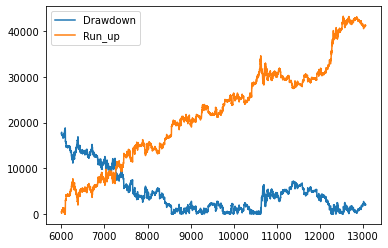

In [16]:
bt.df[6000:][["Drawdown", "Run_up"]].plot()

<AxesSubplot:>

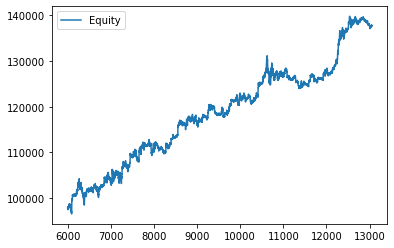

In [17]:
bt.df[6000:][["Equity"]].plot()

In [18]:
trade_l = bt.trade_list

In [19]:
trade_l["MFE"] = pd.concat([(trade_l.EntryHigh - trade_l.EntryPrice) * trade_l.type, (trade_l.EntryLow - trade_l.EntryPrice) * trade_l.type], axis = 1).max(axis = 1)
trade_l["MAE"] = pd.concat([(trade_l.EntryHigh - trade_l.EntryPrice) * trade_l.type, (trade_l.EntryLow - trade_l.EntryPrice) * trade_l.type], axis = 1).min(axis = 1)

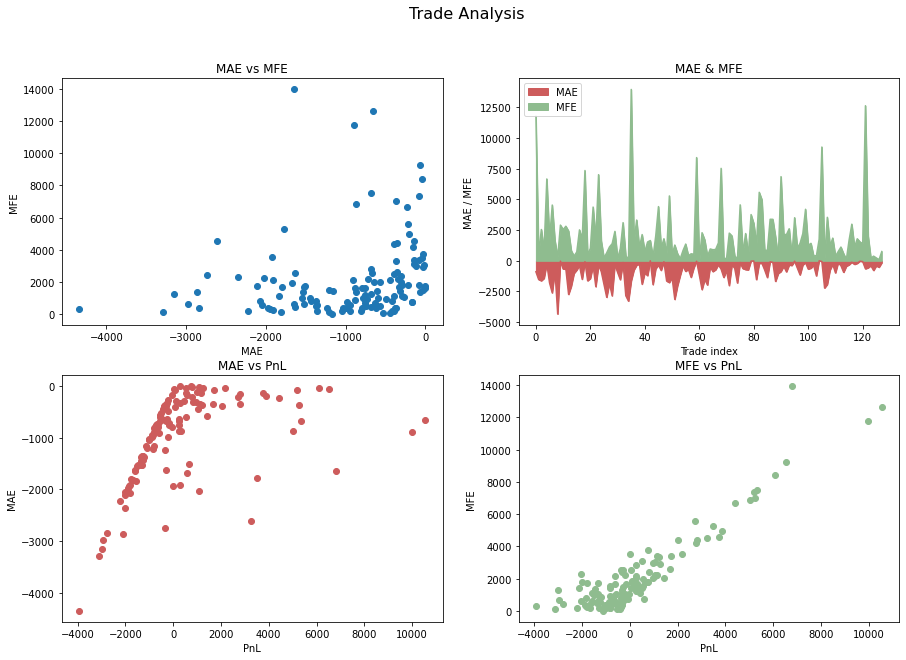

In [20]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
fig.suptitle("Trade Analysis", fontsize = 16)
axes[0, 0].scatter(trade_l.MAE, trade_l.MFE)
axes[0, 0].update(dict(title = "MAE vs MFE", xlabel = "MAE", ylabel = "MFE"))
trade_l[["MAE", "MFE"]].plot.area(ax = axes[0, 1], label = ("MAE", "MFE"), color = ["indianred", "darkseagreen"])
axes[0, 1].update(dict(title = "MAE & MFE", xlabel = "Trade index", ylabel = "MAE / MFE"))
axes[0, 1].legend()
axes[1, 0].scatter(trade_l.Profit, trade_l.MAE, color = "indianred")
axes[1, 0].update(dict(title = "MAE vs PnL", xlabel = "PnL", ylabel = "MAE"))
axes[1, 1].scatter(trade_l.Profit, trade_l.MFE, color = "darkseagreen")
axes[1, 1].update(dict(title = "MFE vs PnL", xlabel = "PnL", ylabel = "MFE"))

plt.show()

In [27]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA, GOOG


class SmaCross(Strategy):
    n1 = 10
    n2 = 20

    def init(self):
        close = self.data.Close
        self.sma1 = self.I(SMA, close, self.n1)
        self.sma2 = self.I(SMA, close, self.n2)

    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.sell()


bt = Backtest(GOOG, SmaCross,
              cash=10000, commission=.002,
              exclusive_orders=True)

output = bt.run()
bt.plot()

C:\Users\user\miniconda3\lib\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

Row(id='2312', ...)

In [62]:
output

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   97.067039
Equity Final [$]                  68221.96986
Equity Peak [$]                   68991.21986
Return [%]                         582.219699
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   25.266427
Volatility (Ann.) [%]               38.383008
Sharpe Ratio                         0.658271
Sortino Ratio                        1.288779
Calmar Ratio                         0.763748
Max. Drawdown [%]                  -33.082172
Avg. Drawdown [%]                   -5.581506
Max. Drawdown Duration      688 days 00:00:00
Avg. Drawdown Duration       41 days 00:00:00
# Trades                                   94
Win Rate [%]                        54.255319
Best Trade [%]                       57.11931
Worst Trade [%]                    -16.629898
Avg. Trade [%]                    

In [ ]:
df = bt.df[:100].copy()


In [230]:
from bokeh.plotting import figure, show

df = bt.df[:100].copy()
df_ = ColumnDataSource(df)
inc = df.Close > df.Open
dec = df.Open > df.Close
inc_df = ColumnDataSource(df[inc])
dec_df = ColumnDataSource(df[dec])

w = 15*60*1000 # half day in ms

TOOLS = "xpan,xwheel_zoom,xbox_zoom,reset,save"

TOOLTIPS = HoverTool(tooltips=[
    ("Date", "@Date{%Y-%m-%d %H:%M:%S}"),
    ("(x,y)", "($x, $y)"),
    ("Close", "@Close{0.0[00000]}")],
    formatters={"@Date": "datetime"},
    mode="vline"
)


p = figure(x_axis_type="datetime", tools=[TOOLS, TOOLTIPS], plot_width=1000, title = "Candlestick")
p.grid.grid_line_alpha=0.3

p.segment("Date", "High", "Date", "Low", color="black", source = df_)
p.vbar("Date", w, "Open", "Close", fill_color="#D5E1DD", line_color="black", source=inc_df)
p.vbar("Date", w, "Open", "Close", fill_color="#F2583E", line_color="black", source=dec_df)

# output_file("candlestick.html", title="candlestick.py example")

# output_notebook()
show(p)  # open a browser

In [35]:
df

,Date,Open,High,Low,Close,Volume
0,2021-10-01 00:00:00,43149.02,43218.00,42914.33,42954.29,801.52103
1,2021-10-01 00:30:00,42954.30,42997.77,42819.86,42950.67,800.71902
2,2021-10-01 01:00:00,42950.66,43314.50,42933.29,43017.60,864.06192
3,2021-10-01 01:30:00,43017.61,43400.00,42906.69,43333.12,1128.33387
4,2021-10-01 02:00:00,43333.12,43473.45,43261.84,43397.54,616.15522
...,...,...,...,...,...,...
13052,2022-06-29 22:00:00,20083.99,20177.31,20036.71,20118.56,2329.46133
13053,2022-06-29 22:30:00,20118.56,20254.20,20050.10,20126.02,1903.32274
13054,2022-06-29 23:00:00,20126.01,20142.79,20000.00,20064.34,2048.20718
13055,2022-06-29 23:30:00,20064.35,20124.71,20030.01,20084.48,1112.31012


## Optimization

```
def strategy_optimization(symbol, interval, starttime, endtime, strategy, para..., 
                          output=[drawdown, profit...], method[exhaustive, genetic, bp]):
    return para, output
```

## Send Order

傳送下單資訊，收取下單回報，追蹤order狀況

In [187]:
import matplotlib

In [185]:
import bokeh

In [186]:
bokeh.__version__

'2.4.3'

In [62]:
#open 2330 TSMC 台積電 demo_file
route=os.getcwd()+'/2330_tw_price.json'
with open(route, 'r') as outfile:
    test=json.load(outfile)

# run code
technical_chart(test)

Loading BokehJS ...

## Graph

In [173]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColumnDataSource
output_notebook()


Loading BokehJS ...

In [174]:

# set hover
hover_price = HoverTool(tooltips = [("Date", "@Date{%Y-%m-%d %H:%M:%S}"), 
                                   ("Open", "@Open{0.0[00000]}"), 
                                   ("High", "@High{0.0[00000]}"), 
                                   ("Low", "@Low{0.0[00000]}"), 
                                   ("Close", "@Close{0.0[00000]}"), 
                                   ("Volume", "@Volume{0.0[00000]}")], # MA, Upper, Lower
                        formatters={"@Date": "datetime"},
                        mode="vline")

hover_equity = HoverTool(tooltips = [("Date", "@Date{%Y-%m-%d %H:%M:%S}"), 
                                   ("Equity", "@Equity{0.0[00000]}"), 
                                   ("Equity_Long", "@Equity_long{0.0[00000]}"), 
                                   ("Equity_Short", "@Equity_short{0.0[00000]}"), 
                                   ("Drawdown", "@Drawdown{0.0[00000]}")],
                        formatters={"@Date": "datetime"},
                        mode="vline")
# use trade_list
hover_pnl = HoverTool(tooltips = [("Date", "@ExitTime{%Y-%m-%d %H:%M:%S}"), 
                                   ("PNL", "@Profit{0.0[00000]}"), 
                                   ("MaxDrawdown", "@MaxDrawn{0.0[00000]}")],
                        formatters={"@Date": "datetime"},
                        mode="vline")
    # hover_MAEMFA hover_MAEPNL
    
# set figure data

df_source = ColumnDataSource(df)
inc_source = ColumnDataSource(df[df.Close > df.Open])
dec_cource = ColumnDataSource(df[df.Close < df.Open])

